# OKCupid Portfolio Project

First, I will read in the data and scan it in order to decide on a problem which can be solved by machine learning.

In [1]:
# import relevant libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('profiles.csv')

data.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
#entries in dataset
print(len(data))

#description of numerical values
data.describe()

59946


,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [4]:
#unique values in categorical columns
print(data.columns)
categ_col = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'job',
       'offspring', 'orientation', 'pets', 'religion', 'sex', 'smokes', 'status']

#for i in categ_col:
#    print(data[i].unique())

print(data['education'].unique())
print(data['job'].unique())

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
['working on college/university' 'working on space camp'
 'graduated from masters program' 'graduated from college/university'
 'working on two-year college' nan 'graduated from high school'
 'working on masters program' 'graduated from space camp'
 'college/university' 'dropped out of space camp'
 'graduated from ph.d program' 'graduated from law school'
 'working on ph.d program' 'two-year college'
 'graduated from two-year college' 'working on med school'
 'dropped out of college/university' 'space camp'
 'graduated from med school' 'dropped out of high school'
 'working on high school' 'masters program' 'droppe

Based on the available data, I will try to predict the income bracket of someone based on his or her age, education, and job. I aim to use a KNN-Regressor model for this.

I will briefly check how the relevant variables of the models are distributed.

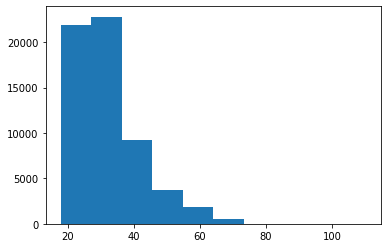

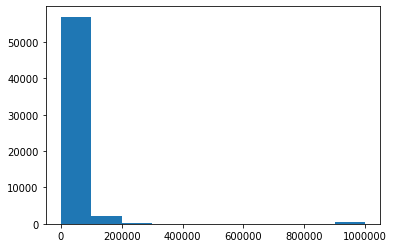

<Figure size 432x288 with 0 Axes>

In [5]:
plt.hist(data['age'])
plt.show()
plt.clf()

df_edu = data['education'].value_counts()
#print(df_edu)

df_job = data['job'].value_counts()
#print(df_job)

plt.hist(data['income'])
plt.show()
plt.clf()

The last histogram showed that there seem to be outliers in the dataset, which we should exclude. In addition, at the beginning we saw that there were negative values in the column. We should check that again.

In [6]:
# check NaN values in the income column
print(data['income'].isna().sum())

# instead of NaN values there seem to be negative values, which have to be excluded 
data = data.loc[data['income'] >= 0]

# exclude outliers based on income column and z-scores above an absolute value of 3 (which is an empirical rule)

from scipy import stats

data['z_score_income']=stats.zscore(data['income'])
data = data.loc[data['z_score_income'].abs()<=3]

0


10983
1     80000
3     20000
11    40000
13    30000
14    50000
Name: income, dtype: int64


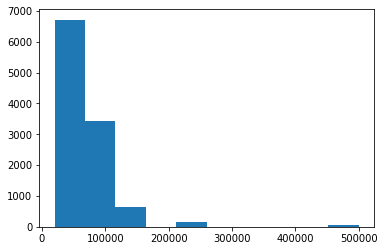

20000     2952
100000    1621
80000     1111
30000     1048
40000     1005
50000      975
60000      736
70000      707
150000     631
250000     149
500000      48
Name: income, dtype: int64


<Figure size 432x288 with 0 Axes>

In [7]:
# check the data - seems pretty okay!
print(len(data))
print(data['income'].head())

plt.hist(data['income'])
plt.show()
plt.clf()

print(data['income'].value_counts())

Unfortunately, it seems like there is no data from anyone with an income of 90,000. Let's see how well that plays out in the end.

Now, I will have to prepare the data:
* save relevant columns in two new datasets: one with the input variables, and one with the target variable
* convert categorical columns into binary values
* create test and training sets
* standardize data so that all variables will be equally important in the model

In [10]:
# save relevant data
X = data[['age', 'education', 'job']]
y = data['income']

# convert categorical columns into binary values
X = pd.get_dummies(X, columns=['education'])
X = pd.get_dummies(X, columns=['job'])

# split into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 34)

# standardize data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Now that the data is ready, we can try out different classifiers to see which one works best. I will try both a KNN-Classifier as well as a Support Vector Machine (SVM).

### KNN-Classifier

As the data has been prepared, all that remains is training and testing the model.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

#accuracies = {}

#for i in range(1, 100):
#    model_1 = KNeighborsClassifier(n_neighbors = i)
#    model_1.fit(X_train, y_train)
#    accuracies[i] = model_1.score(X_test, y_test)

#print(accuracies)

import operator

# returns 54
#max(accuracies.items(), key=operator.itemgetter(1))[0]

model_1 = KNeighborsClassifier(n_neighbors = 54)
model_1.fit(X_train, y_train)
y_predict = model_1.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
print(cm)

[[531  10  22  15   2   0   9  20   0   0   0]
 [134   8  19  14   1   2  11  17   0   0   0]
 [105   6  20  19   0   4  12  32   0   0   0]
 [ 75   7  20  17   4   3  16  49   0   0   0]
 [ 49   3  15  11   2   2  22  35   3   0   0]
 [ 39   9   8   8   2   2  13  59   1   0   0]
 [ 43   8   9   7   1   2  22 110   3   0   0]
 [ 36   8   8  12   2   0  32 230  15   0   0]
 [ 18   1   7   1   0   0   5  75  18   0   0]
 [  4   2   0   1   0   0   2  16   1   0   0]
 [  4   0   1   0   0   0   1   4   1   0   0]]


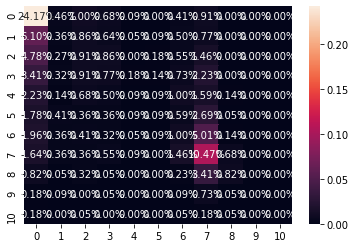

In [27]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')
plt.show()

## SVM

As the KNN Classifier was not very accurate in predicting the income, I will try out another model.

In [33]:
from sklearn.svm import SVC

accuracies = {}

for i in list(np.arange(0.01,1.1,0.1)):
    model_2 = SVC(C = i)
    model_2.fit(X_train, y_train)
    accuracies[i] = model_2.score(X_test, y_test)

print(accuracies)

{0.01: 0.3409194355939918, 0.11: 0.39326354119253526, 0.21000000000000002: 0.3946290395994538, 0.31000000000000005: 0.39189804278561674, 0.41000000000000003: 0.3950842057350933, 0.51: 0.39371870732817477, 0.6100000000000001: 0.3896222121074192, 0.7100000000000001: 0.3878015475648612, 0.81: 0.3882567137005007, 0.91: 0.38643604915794266, 1.01: 0.38461538461538464}


In [34]:
max(accuracies.items(), key=operator.itemgetter(1))[0]

0.41000000000000003

While the SVM performs slightly better than the first model, it still does not perform very well. It seems like this problem could not be solved with the available data/another problem should be chosen. 